In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas
import json
import numpy as np

In [2]:
import sys

In [3]:
plt.style.use('seaborn')

In [4]:
params_paths = (path for path in glob.glob("../logs/*.json"))
params = list()
for path in params_paths:
    with open(path, "r") as f:
        params.append(json.load(f))

In [5]:
df_params = pandas.DataFrame(params)
df_params = df_params.explode("runs")
df_params["run_name"] = df_params["runs"].apply(lambda x: x["run_name"])
df_params["impl"] = df_params["language"] + "_" + df_params["matmul_impl"]
df_params["min"] = df_params["runs"].apply(lambda x: np.min(x["times"]))
df_params["0.05q"] = df_params["runs"].apply(lambda x: np.quantile(x["times"], 0.05))
df_params["shapes"] = df_params["run_name"].apply(lambda x: x[13:])

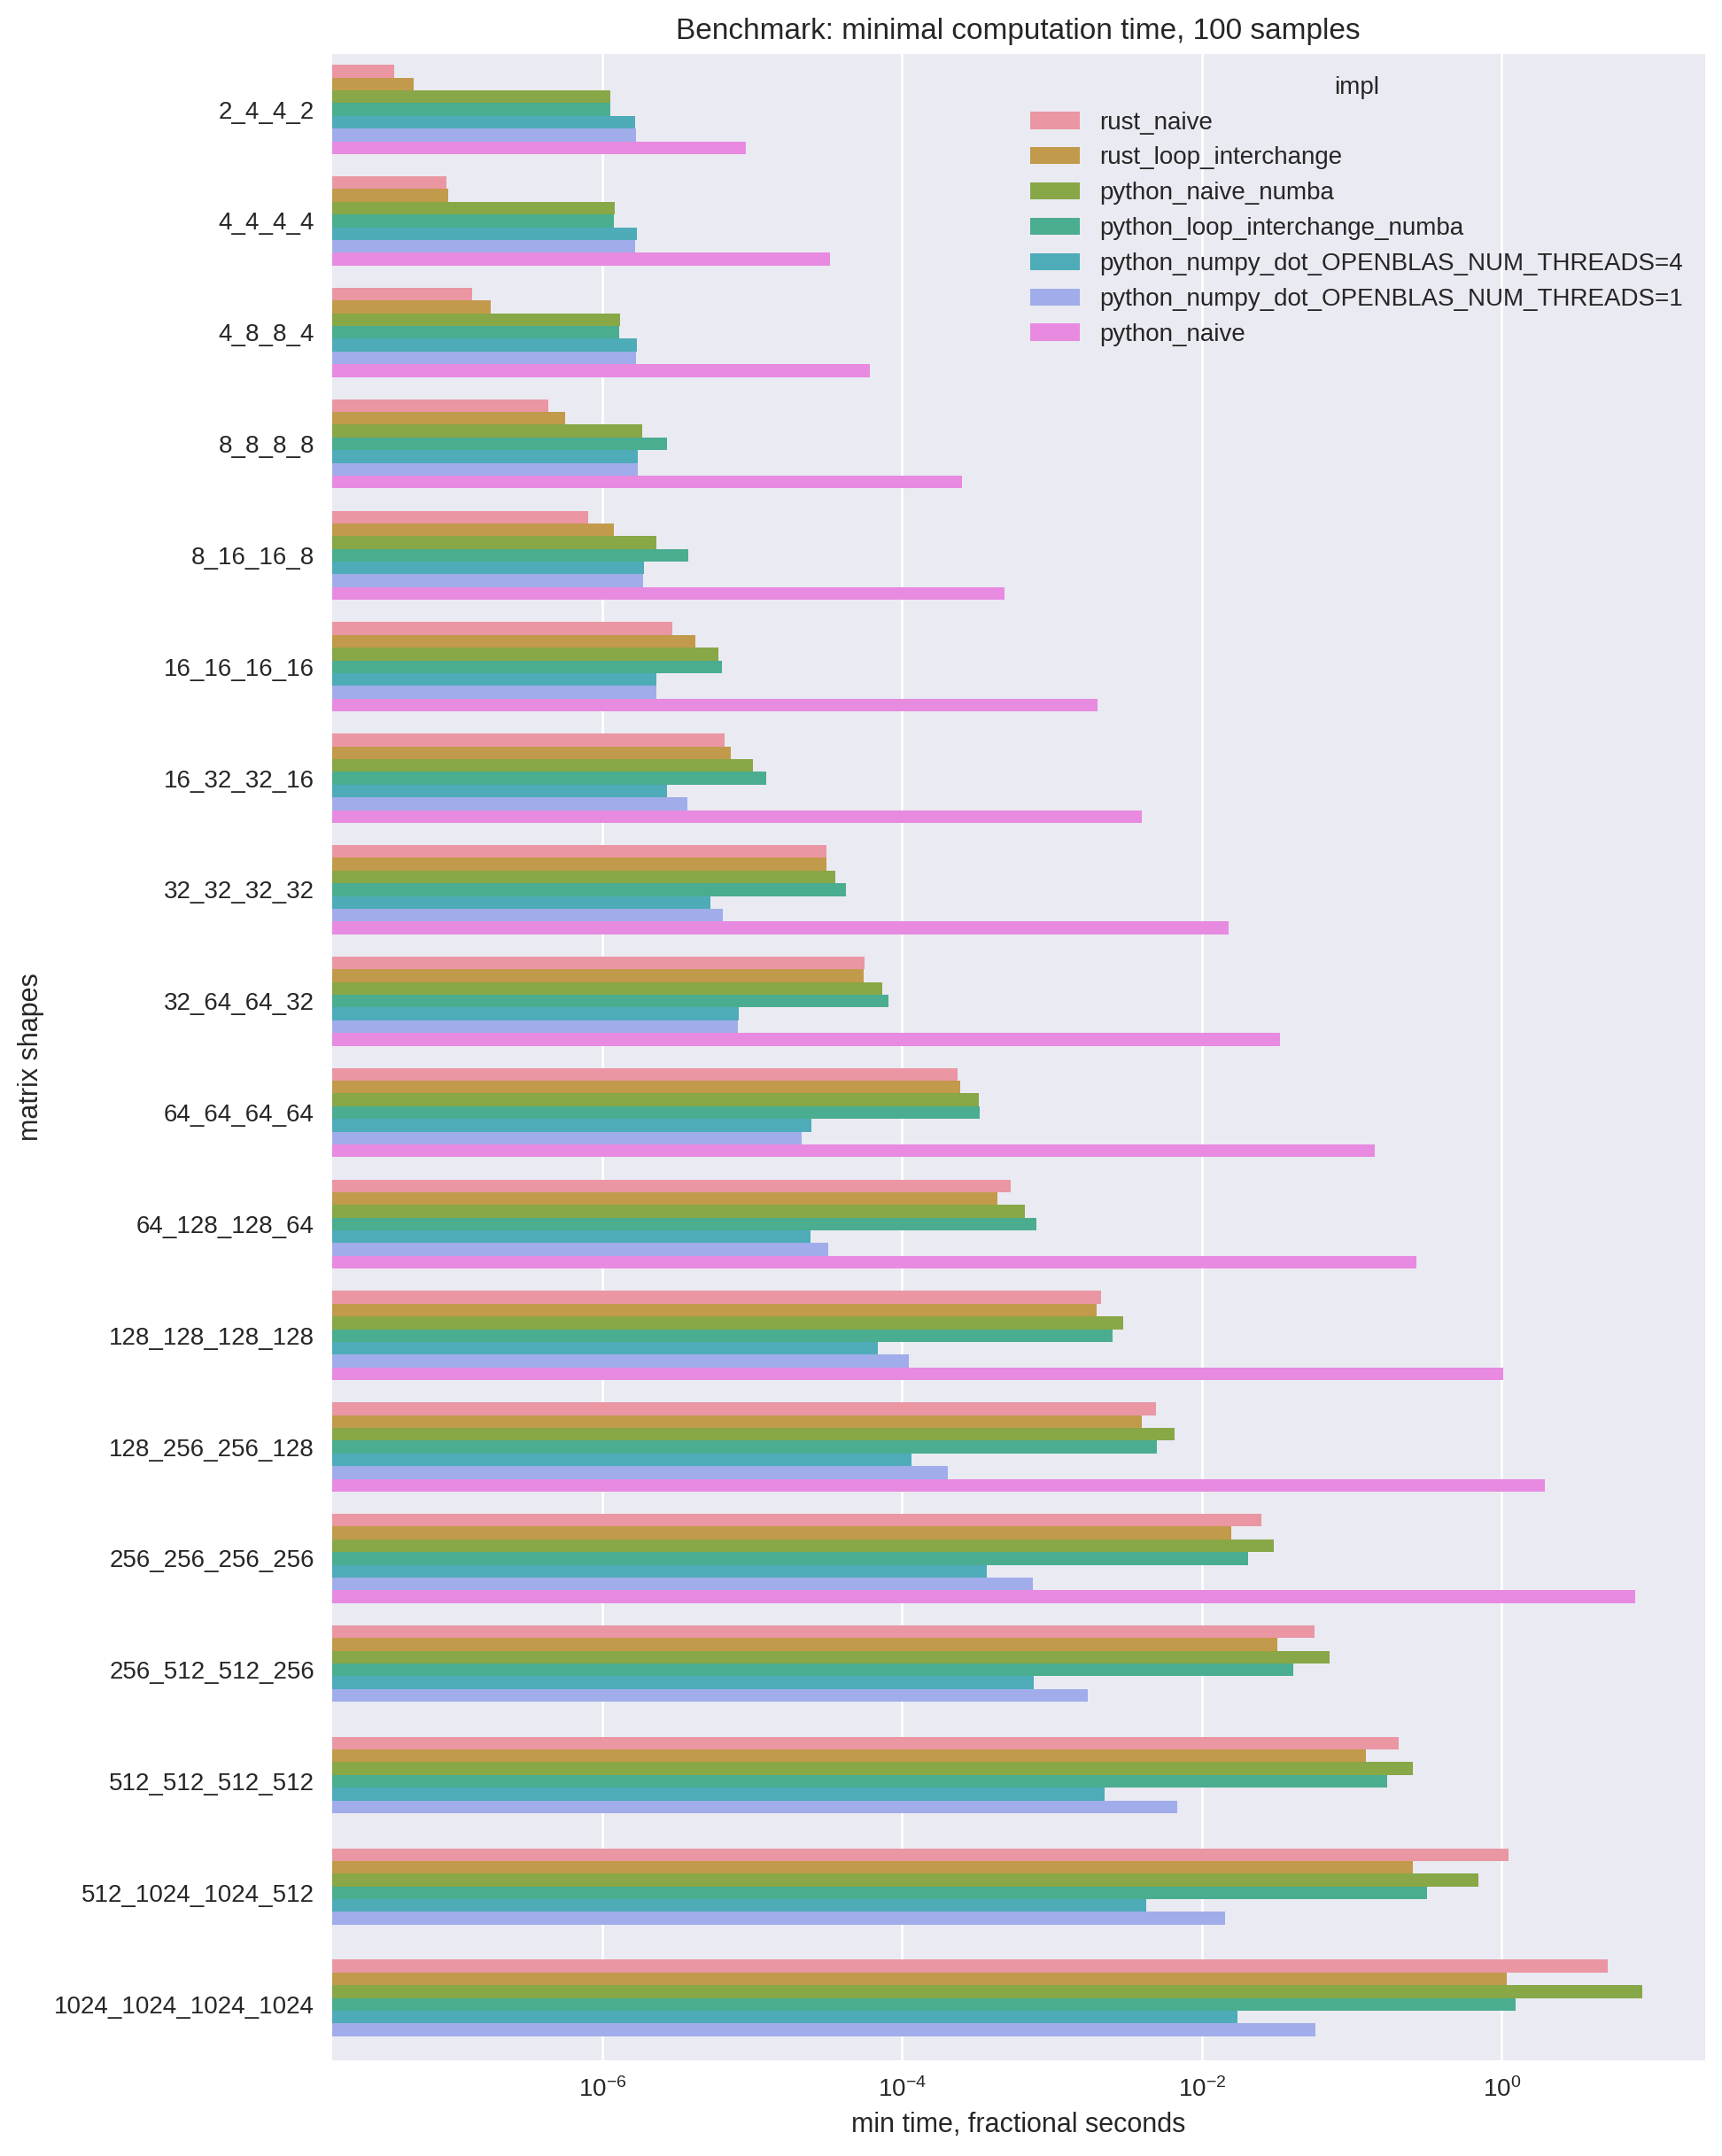

In [6]:
fig, ax = plt.subplots(figsize = (10,15), dpi=200)
ax = sns.barplot(data=df_params.sort_values(by=["run_name", "min"]), y="shapes", x="min", hue="impl",ax=ax)
ax.set_xscale("log")
ax.set_ylabel("matrix shapes")
ax.set_title("Benchmark: minimal computation time, 100 samples")
_ = ax.set_xlabel("min time, fractional seconds")

In [7]:
print(df_params.sort_values(by=["run_name", "min"])[["shapes", "language", "matmul_impl", "min"]].set_index("shapes").to_markdown())

|              shapes | language   | matmul_impl                      |         min |
|--------------------:|:-----------|:---------------------------------|------------:|
|             2_4_4_2 | rust       | naive                            | 4.1e-08     |
|             2_4_4_2 | rust       | loop_interchange                 | 5.5e-08     |
|             2_4_4_2 | python     | naive_numba                      | 1.134e-06   |
|             2_4_4_2 | python     | loop_interchange_numba           | 1.138e-06   |
|             2_4_4_2 | python     | numpy_dot_OPENBLAS_NUM_THREADS=4 | 1.648e-06   |
|             2_4_4_2 | python     | numpy_dot_OPENBLAS_NUM_THREADS=1 | 1.681e-06   |
|             2_4_4_2 | python     | naive                            | 9.084e-06   |
|             4_4_4_4 | rust       | naive                            | 9.2e-08     |
|             4_4_4_4 | rust       | loop_interchange                 | 9.4e-08     |
|             4_4_4_4 | python     | loop_interchange_